In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as sms_diagnostic
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.arima.model import ARIMA


In [45]:
data = pd.read_excel('Фурье_данные.xlsx', sheet_name = 'Лист2')
data


,t,AC,ACE,ABX,AA,.ACN,ADI
0,1,28.52,29.35,15.25,19.41,14.98,27.75
1,2,29.25,30.59,15.05,20.10,15.71,29.58
2,3,29.66,30.55,14.97,19.91,15.60,29.65
3,4,29.78,31.71,15.08,20.04,15.27,29.18
4,5,30.11,30.91,14.99,21.63,15.24,29.86
...,...,...,...,...,...,...,...
58,59,36.05,35.90,17.47,24.96,17.65,32.75
59,60,36.45,35.40,17.61,24.51,17.33,33.04
60,61,36.84,35.95,17.49,25.24,18.00,34.56
61,62,36.87,34.84,17.60,25.09,17.86,34.05


In [46]:
Y = data['AC'][4:20]

In [47]:
Y

4     30.11
5     29.99
6     29.60
7     29.50
8     29.90
9     30.22
10    31.11
11    31.10
12    31.10
13    31.20
14    32.65
15    32.61
16    32.21
17    31.84
18    32.35
19    31.50
Name: AC, dtype: float64

In [48]:
model = ARIMA(Y, order=(4, 0, 0)).fit()

In [49]:
pred = model.predict(start=1,end=36)
pd.concat([pd.DataFrame([None, None, None, None]), pred], axis = 0)

/var/folders/d7/6p__2hvj39l5ph8mdpjb3lkr0000gn/T/ipykernel_2317/2167202705.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([pd.DataFrame([None, None, None, None]), pred], axis = 0)


,0
0,NaN
1,NaN
2,NaN
3,NaN
5,30.247555
6,30.151639
7,29.800918
8,29.753688
9,30.145643
10,30.428365


/var/folders/d7/6p__2hvj39l5ph8mdpjb3lkr0000gn/T/ipykernel_2317/2893839505.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plt.plot(np.arange(1, 41),pd.concat([pd.DataFrame([None, None, None, None]), pred], axis = 0).values, label = 'A^')


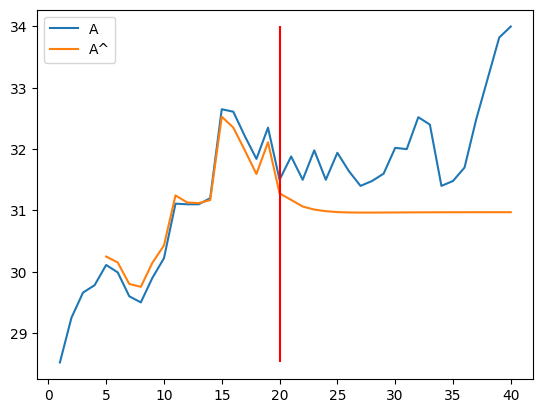

In [56]:
plt.plot(np.arange(1, 41), data['AC'][:40].values, label = 'A')
plt.plot(np.arange(1, 41),pd.concat([pd.DataFrame([None, None, None, None]), pred], axis = 0).values, label = 'A^')
plt.vlines(20, ymin = np.min(data['AC'][:40].values), ymax = np.max(data['AC'][:40].values), color = 'r')
plt.legend()